<a href="https://colab.research.google.com/github/Subhasreemuthaluru/Project/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Project_Data.csv')

print(df.columns.values)

['Sl No' 'Sample ID' 'Age' 'Ob_Score' 'BMI' 'Consistency_Score'
 'Position_Score' 'Effacement_Score' 'Dialation_Score' 'Station_Score'
 'Total_Bishop_Score' 'Cerv_Len_cms' 'Cerv_Wid_cms' 'Induction' 'Del_mode']


In [4]:
df.sample(5)

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
1061,1062,D62,27,G1,25.600000,0,1,0,2,1,3,3.32000,0.870000,1,0
1001,1002,D2,24,G1,23.500000,2,0,2,0,3,4,NaN,NaN,1,0
614,615,DT615,22,G1,29.577361,0,1,0,1,3,2,NaN,NaN,1,0
649,650,DT650,20,G1,23.216289,0,2,1,3,0,6,2.34052,1.863478,1,0
355,356,DT356,25,G1,24.307347,0,2,3,1,3,6,NaN,NaN,1,0


In [5]:
df.shape

(1100, 15)

In [6]:
df.drop (columns = ['Sl No', 'Sample ID','Age'],axis = 1, inplace = True  )

In [7]:
df.shape

(1100, 12)

In [8]:
df.sample(5)

,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
465,G1,25.153838,1,2,1,1,3,5,NaN,NaN,1,0
271,G1,26.280542,0,0,0,1,0,1,NaN,NaN,1,1
387,G1,22.421398,1,0,0,3,2,4,NaN,NaN,1,0
757,G1,25.711668,0,0,2,2,2,4,2.320575,1.106899,1,0
72,G1,24.897068,1,0,3,0,0,4,NaN,NaN,1,1


In [9]:
df.dtypes

Ob_Score               object
BMI                   float64
Consistency_Score       int64
Position_Score          int64
Effacement_Score        int64
Dialation_Score         int64
Station_Score           int64
Total_Bishop_Score      int64
Cerv_Len_cms          float64
Cerv_Wid_cms          float64
Induction               int64
Del_mode                int64
dtype: object

In [10]:
print(df['Ob_Score'].unique())

['G1' 'G2A1' 'G3A2']


In [11]:
print(df['Ob_Score'].value_counts())

G1      1034
G2A1      44
G3A2      22
Name: Ob_Score, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Ob_Score'] = label_encoder.fit_transform(df['Ob_Score'])

In [13]:
df.dtypes

Ob_Score                int64
BMI                   float64
Consistency_Score       int64
Position_Score          int64
Effacement_Score        int64
Dialation_Score         int64
Station_Score           int64
Total_Bishop_Score      int64
Cerv_Len_cms          float64
Cerv_Wid_cms          float64
Induction               int64
Del_mode                int64
dtype: object

In [14]:
print(df['Ob_Score'].unique()) #converted ob_score into numeric values

[0 1 2]


In [15]:
print(df)

      Ob_Score        BMI  Consistency_Score  Position_Score  \
0            0  28.255713                  0               0   
1            0  29.772191                  2               1   
2            0  28.511248                  0               0   
3            0  28.772695                  2               0   
4            0  27.488918                  0               2   
...        ...        ...                ...             ...   
1095         0  29.500000                  2               2   
1096         0  29.600000                  2               2   
1097         0  31.000000                  2               1   
1098         0  32.300000                  1               0   
1099         0  30.000000                  1               2   

      Effacement_Score  Dialation_Score  Station_Score  Total_Bishop_Score  \
0                    3                0              2                   3   
1                    0                3              1                   6 

In [16]:
#We need to remove the NaN values....

In [17]:
df.isnull().sum()

Ob_Score                0
BMI                     0
Consistency_Score       0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

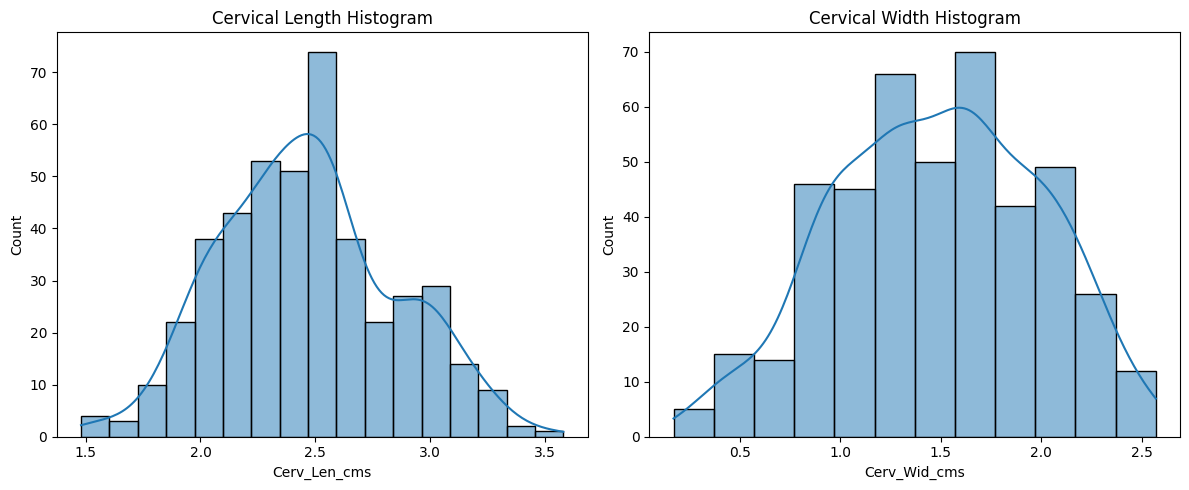

In [18]:
#plotting a histograph of distribution before resolving the NaN values in both the columns
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Cerv_Len_cms'], kde=True, ax=axes[0])
axes[0].set_title('Cervical Length Histogram')
sns.histplot(df['Cerv_Wid_cms'], kde=True, ax=axes[1])
axes[1].set_title('Cervical Width Histogram')

plt.tight_layout()
plt.show()

In [19]:
#Missing value treatment using KNN_Imputer(resolving the NaN values)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

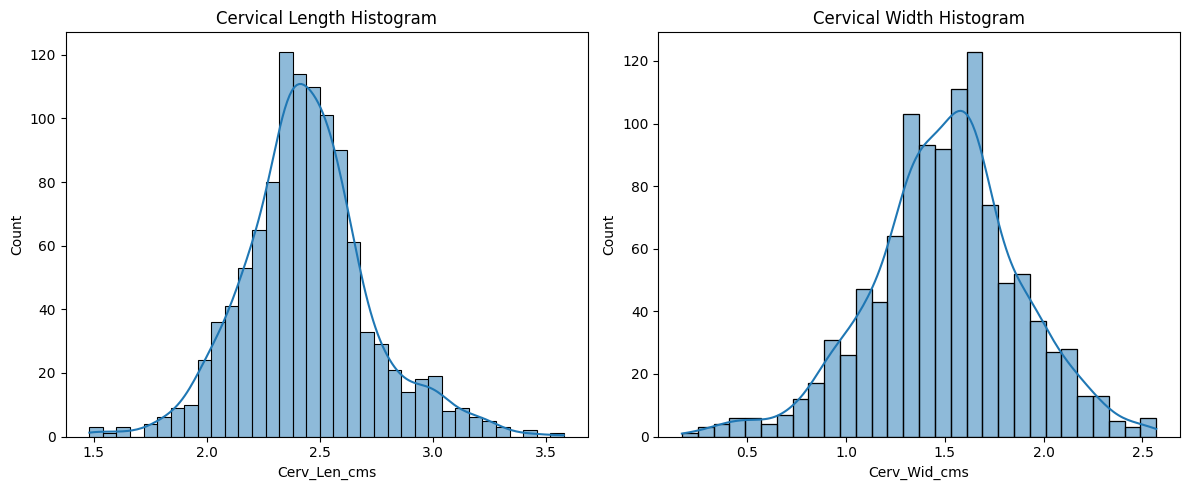

In [20]:
#plot a histograph of distribution after resolving the NaN values in both columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Cerv_Len_cms'], kde=True, ax=axes[0])
axes[0].set_title('Cervical Length Histogram')
sns.histplot(df['Cerv_Wid_cms'], kde=True, ax=axes[1])
axes[1].set_title('Cervical Width Histogram')

plt.tight_layout()
plt.show()

In [21]:
df.isnull().sum() #there are no NaN values in the dataset

Ob_Score              0
BMI                   0
Consistency_Score     0
Position_Score        0
Effacement_Score      0
Dialation_Score       0
Station_Score         0
Total_Bishop_Score    0
Cerv_Len_cms          0
Cerv_Wid_cms          0
Induction             0
Del_mode              0
dtype: int64

In [22]:
x = df.iloc[:,0:11]
y = df.iloc[:,-1]

print(x.shape)
print(y.shape)

(1100, 11)
(1100,)


In [23]:
print(x)

      Ob_Score        BMI  Consistency_Score  Position_Score  \
0          0.0  28.255713                0.0             0.0   
1          0.0  29.772191                2.0             1.0   
2          0.0  28.511248                0.0             0.0   
3          0.0  28.772695                2.0             0.0   
4          0.0  27.488918                0.0             2.0   
...        ...        ...                ...             ...   
1095       0.0  29.500000                2.0             2.0   
1096       0.0  29.600000                2.0             2.0   
1097       0.0  31.000000                2.0             1.0   
1098       0.0  32.300000                1.0             0.0   
1099       0.0  30.000000                1.0             2.0   

      Effacement_Score  Dialation_Score  Station_Score  Total_Bishop_Score  \
0                  3.0              0.0            2.0                 3.0   
1                  0.0              3.0            1.0                 6.0 

In [24]:
print(y)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1095    0.0
1096    0.0
1097    0.0
1098    0.0
1099    0.0
Name: Del_mode, Length: 1100, dtype: float64


In [25]:
#standardizing the attributes
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scaling= scal.fit_transform(x) #scaling is of type array

In [26]:
x=pd.DataFrame(scaling, columns = x.columns)
x.sample(5)

,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction
943,-0.237356,0.036318,-1.18662,0.065848,1.242464,-1.295044,-1.315501,-0.495536,-0.468681,0.304111,0.252646
172,2.729598,-0.020881,-1.18662,0.065848,-0.524453,-1.295044,-0.436903,-1.523037,0.023705,0.373236,0.252646
478,-0.237356,0.037939,1.25316,0.065848,-0.524453,-1.295044,-0.436903,-0.495536,0.007895,0.139211,0.252646
1065,-0.237356,0.007768,-1.18662,0.065848,-0.524453,1.381002,1.320293,0.018215,-1.180070,-1.469598,0.252646
804,5.696552,-0.025018,-1.18662,1.293524,-0.524453,-0.403029,-0.436903,-0.495536,-0.958958,0.040247,0.252646


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
x_train.shape , y_train.shape, x_test.shape , y_test.shape

((880, 11), (880,), (220, 11), (220,))

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(11,),activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(4,kernel_regularizer=regularizers.l2(0.01),
                       activity_regularizer=regularizers.l1(0.01),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.9368 - accuracy: 0.4284
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.8185 - accuracy: 0.5080
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.5773
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.6352
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.6750
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.7000
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.7205
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7375
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.7443
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.7466
Epoch 11/

In [30]:
model.evaluate(x_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.0000e+00


[0.018543114885687828, 0.0]

In [31]:
p=model.predict(x_test)
p[:5]

7/7 [==============================] - 0s 2ms/step


array([[0.27270836],
       [0.03427497],
       [0.21677662],
       [0.01775254],
       [0.80393267]], dtype=float32)

In [32]:
y_test[:5]

395     0.0
860     0.0
477     0.0
671     0.0
1002    1.0
Name: Del_mode, dtype: float64

In [33]:
predict=[]
for ele in p:
  if ele>0.5:
    predict.append(1)
  else:
    predict.append(0)

In [36]:
predict[:5]

[0, 0, 0, 0, 1]

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       159
         1.0       0.68      0.44      0.53        61

    accuracy                           0.79       220
   macro avg       0.74      0.68      0.70       220
weighted avg       0.77      0.79      0.77       220



Text(95.72222222222221, 0.5, 'Truth')

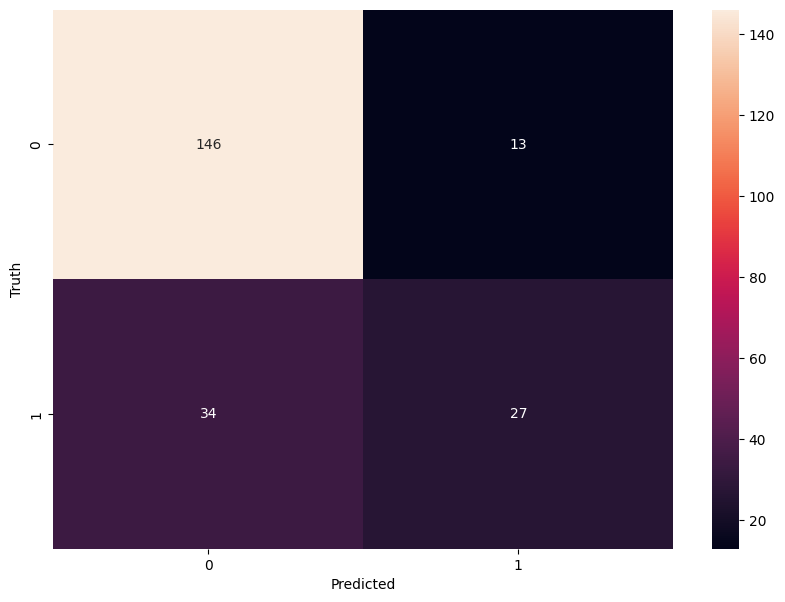

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [40]:
obs=0
bmi=28.255713
pos=0
cons=0
eff=3
dial=0
stat=2
bis=3
cervl=2.833775
cervw=1.264517
indu=1

smt=np.array([[obs,bmi,pos,cons,eff,dial,stat,bis,cervl,cervw,indu]])

In [41]:
scaledip= scal.transform(smt)
dfip=pd.DataFrame(scaledip)
print(dfip)

         0         1        2         3         4         5         6   \
0 -0.237356  0.018711 -1.18662 -1.161828  1.242464 -1.295044  0.441695   

         7         8         9         10  
0 -1.009287  1.396212 -0.632836  0.252646  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
ip_pred=model.predict(dfip)
output="Normal Delivery"
if ip_pred>0.5:
  output="cesarean"
print(output)

1/1 [==============================] - 0s 34ms/step
cesarean
